In the lending industry, investors provide loans to borrowers in exchange for the promise of repayment with interest. If the borrower repays the loan, then the lender would make profit from the interest. However, if the borrower fails to repay the loan, then the lender loses money. Therefore, lenders face the problem of predicting the risk of a borrower being unable to repay a loan. In this study, the data from Lending club is used to train several Machine Learning models to determine if the borrower has the ability to repay its loan. In addition, we would analyze the performance of the models.

|Variable| Description|
|:---|:---
|Loan_ID|Unique Loan ID|
|Gender	|Male/ Female|
|Married	Applicant| married (Y/N)|
|Dependents|Number of dependents|
|Education|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Applicant income|
|CoapplicantIncome|Coapplicant income|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit history meets guidelines|
|Property_Area|Urban/ Semi Urban/ Rural|
|Loan_Status	(Target) |Loan approved (Y/N)|


**HYPOTHESIS**
- **Salary:** Applicants with higher income/salary have a higher chance of laon approval
- **Loan amount** If the loan amount is less then it has a higher chance of approval
- **Loan term** Loans of less amount and short repayment amount have a higher chance of approval
- **Previous history** Applicants who have repayed their previous loans should have a higher chance of loan approval

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#Load the dataset
train=pd.read_csv("train.csv")
test=pd.read_csv('test.csv')
# Creat a copy of the data
train_df = train.copy()
test_df = test.copy()

# Understanding the data

In [70]:
#glimpse of the data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [72]:
# Column names
print(train.columns)
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [73]:
#Shape
print('The shape of train dataset:',train.shape)
print('The shape of test dataset:',test.shape)

The shape of train dataset: (614, 13)
The shape of test dataset: (367, 12)


- The train dataset has  **614 rows and 13 columns**- 614 customers with 13 features(12 dependants variables and 1 target variable) describing the customer while the test data had 367 customers described by 12 features. The test data does not has the target variable which is the loan status this is what we are suppose to predict

In [74]:
# datatype
print("=======================")
print("train data dtypes")
print("=======================")
print(train.dtypes)
print("=======================")
print
print("test data dtypes")
print("==========================")
print(test.dtypes)

train data dtypes
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
test data dtypes
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


**There are three types of data:**
- **Float 64**:Values which have some decimal points(numerical values).Loan amount, loan amoun term and credit history are floats
- **Int64**:Represents the interger values-Application Income
- **Object**: Represents the categorical variables. The categorical variables in the dataset are Gender,Married, Dependants,Education,self employed,proporty area and loan status
 

<AxesSubplot:title={'center':'Credit_History'}>

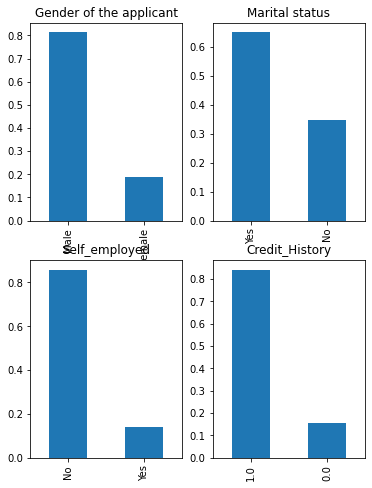

In [75]:
# Visualizing the ordinal variables
#tight_layout(pad=3.0)
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(6,8),title='Gender of the applicant')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Marital status')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')


From the bar graphts it can be inferred that:
  - 80% of the applicants are men
  - Around 65% of the applicants are married
  - Around 15% fo the applicants are  self employed 
  - ~80 f the applicants have repaid their loan

<AxesSubplot:title={'center':'Education level'}>

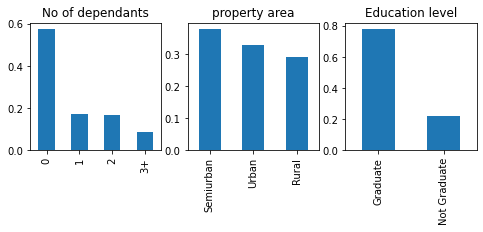

In [76]:
# Visualizing the Ordinal variables
#tight_layout(pad=3.0)
plt.figure(1)
plt.subplot(331)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(8,8),title='No of dependants')
plt.subplot(332)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='property area')
plt.subplot(333)
train['Education'].value_counts(normalize=True).plot.bar(title='Education level')

From the bar graphts it can be inferred that:
  - Most of the applicants have no dependants
  - Relatively most of the applicants live in semi urban 
  - ~80 f the applicants are graduates

<AxesSubplot:title={'center':'ApplicantIncome'}>

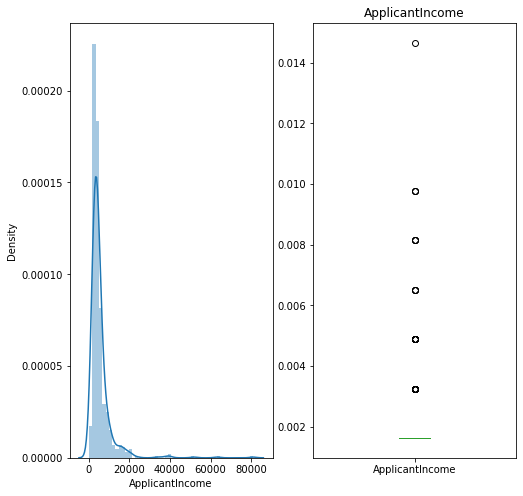

In [77]:
# Numerical variables
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].value_counts(normalize=True).plot.box(figsize=(8,8),title='ApplicantIncome')
# plt.subplot(332)
# train['CoapplicantIncome'].value_counts(normalize=True).plot.bar(title='CoapplicantIncome')
# plt.subplot(333)
# train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan_Amount_Term')
# plt.subplot(333)

- The data is skewed towards right, meaning the income is not normaly distributed. From the boxplot, there is evidence of outliers this could be a reflection of income disparity

Text(0.5, 0.98, ',')

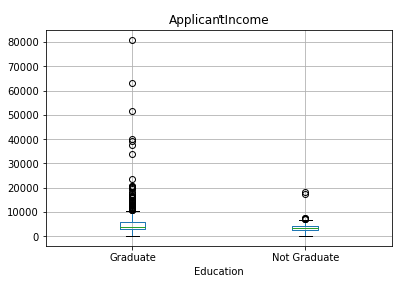

In [78]:
# lets check for application income per education
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle(',')

- Most of the graduates earn alot of income,they appear to be outliers 

<AxesSubplot:title={'center':'CoapplicantIncome'}>

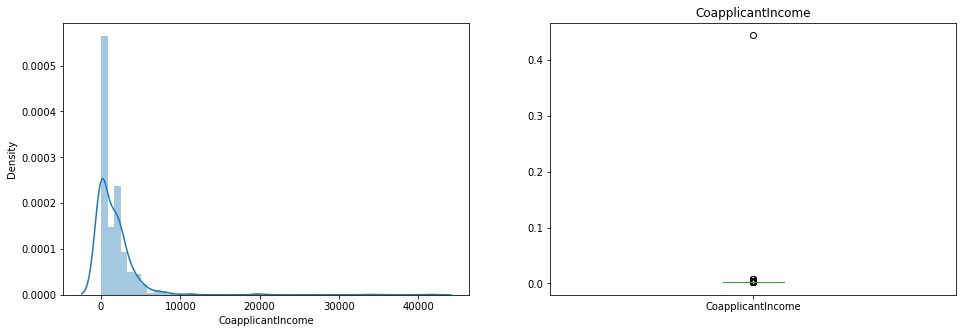

In [79]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].value_counts(normalize=True).plot.box(figsize=(16,5),title='CoapplicantIncome')

- Income, not normally ditributed skewed to the left. Majority lie between 0 and 500. As the applicant income there are outliers

<AxesSubplot:title={'center':'LoanAmount'}>

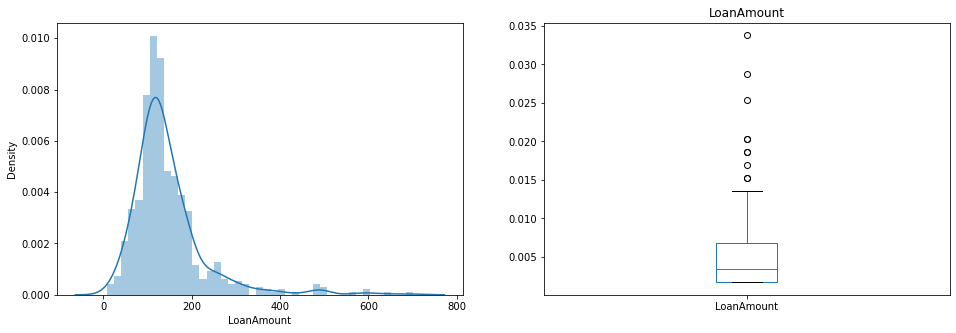

In [80]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].value_counts(normalize=True).plot.box(figsize=(16,5),title='LoanAmount')

<AxesSubplot:title={'center':'Loan Term'}>

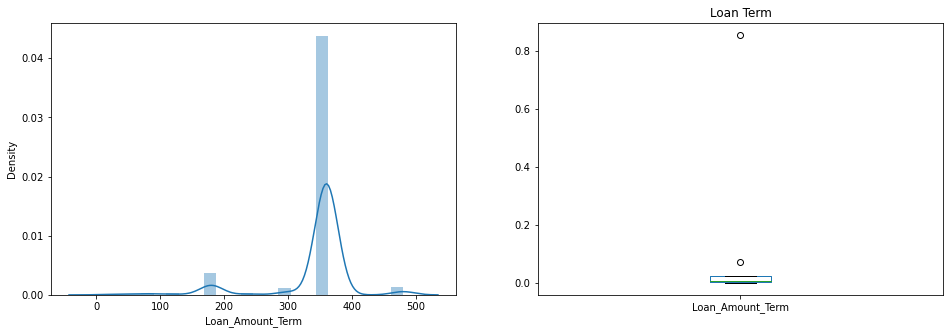

In [81]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['Loan_Amount_Term']);
plt.subplot(122)
train['Loan_Amount_Term'].value_counts(normalize=True).plot.box(figsize=(16,5),title='Loan Term')

In [82]:
numerical_columns=['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']
for j in numerical_columns :
    print (j ,round(train[j].mean(),2),round(train[j].median(),2))


LoanAmount 146.41 128.0
ApplicantIncome 5403.46 3812.5
CoapplicantIncome 1621.25 1188.5
Loan_Amount_Term 342.0 360.0


- The distribution of applicant income is right-skewed, and the median applicant income is 5403.
- The distribution of Co-applicant income is right-skewed, and the median Coapplicant income is 1621.
- The distribution of Loan Amounts (000') is right-skewed, and the median loan amount is 128 thousand.
- The distribution of Loan Term is left-skewed, and the median loan term is 30 years.

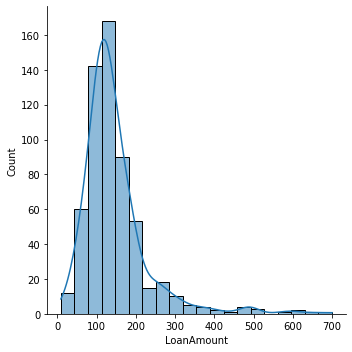

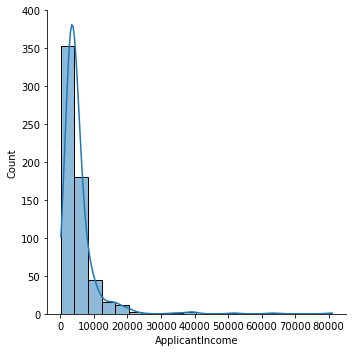

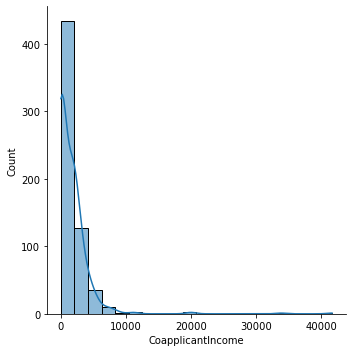

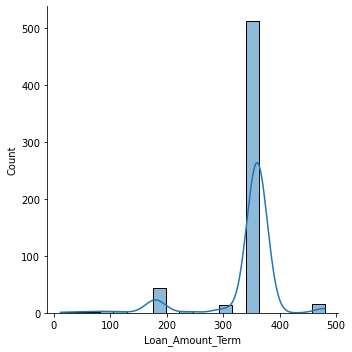

In [83]:
for idx,num_col in enumerate(numerical_columns):
    sns.displot(x= num_col,data=train,bins=20,kde= True)
    plt.show()

# Target Variable

In [84]:
print(train.Loan_Status.value_counts())
print("============")
print(train.Loan_Status.value_counts(normalize=True))


Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


<AxesSubplot:>

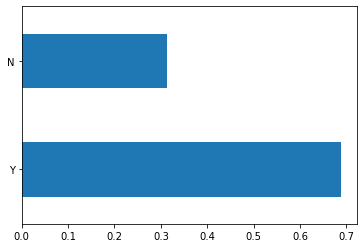

In [85]:
train.Loan_Status.value_counts(normalize=True).plot.barh()

- From the dataset, 422 out of 614 of the applicants had their loan approved which represents 68.7% while 192 applicant loans were rejected which represents 31.2%

# Relationship of the Variables with the Target Variable( Loan Status)in the Data set

- Lets us check on the hypothesis by looking at the relationship between the categorical and independent  variable

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<AxesSubplot:xlabel='Gender'>

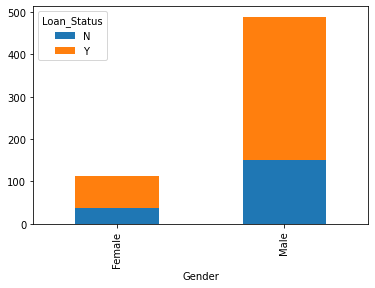

In [86]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
print(Gender)
Gender.plot.bar(stacked=True)

<AxesSubplot:xlabel='Gender'>

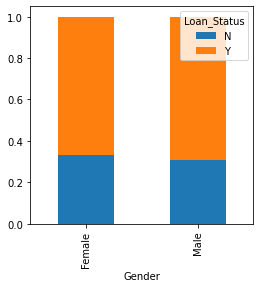

In [87]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

- The percentage of the approved female is relative similar to the approved male.

In [88]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

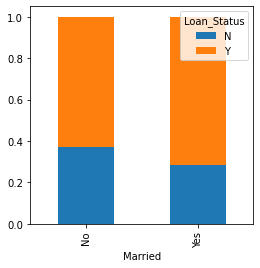

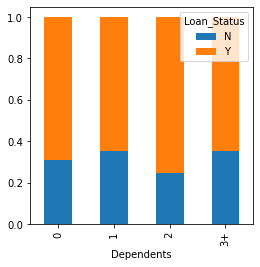

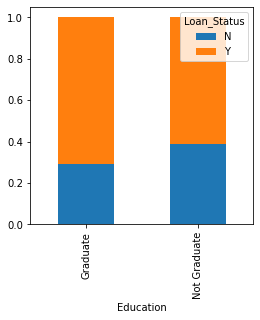

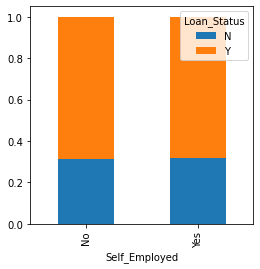

In [89]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
##########################################################################

Dependants=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependants.div(Dependants.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

########################################################################
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

###################################################################################
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


#########################################################################################




- The proportion of approved loans from married applicants is higher than the proportion of unmarried
- The proportion of approved of loans from self employed applicants is  similar to those who are non self employed
- The proportion of approved laons from the graduate applicants is slightly higher than 'not_graduated' applicants
- Their similar proportions of the approved loans on the number of dependents from -3+


<AxesSubplot:xlabel='Credit_History'>

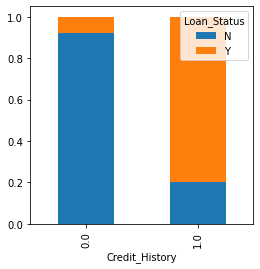

In [90]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))


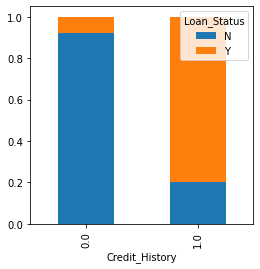

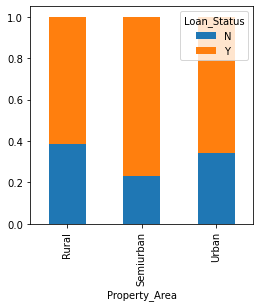

In [91]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

###############################################################################################

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

- Those applicants from semiurban areas have higher proportions of loan approval
- Applicants with credit history of 1 have a higher chance of loan approval


Gender         Female      Male
Loan_Status                    
N            0.330357  0.306748
Y            0.669643  0.693252
Married            No      Yes
Loan_Status                   
N            0.370892  0.28392
Y            0.629108  0.71608
Dependents          0         1         2        3+
Loan_Status                                        
N            0.310145  0.352941  0.247525  0.352941
Y            0.689855  0.647059  0.752475  0.647059
Education    Graduate  Not Graduate
Loan_Status                        
N            0.291667       0.38806
Y            0.708333       0.61194
Self_Employed     No       Yes
Loan_Status                   
N              0.314  0.317073
Y              0.686  0.682927
Property_Area     Rural  Semiurban     Urban
Loan_Status                                 
N              0.385475    0.23176  0.341584
Y              0.614525    0.76824  0.658416
Credit_History       0.0       1.0
Loan_Status                       
N               0.9213

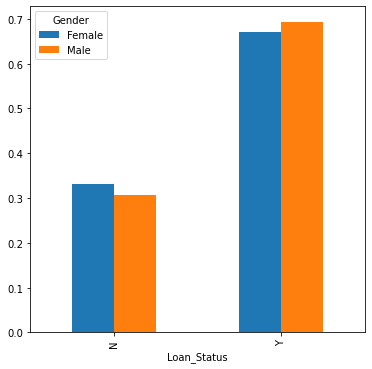

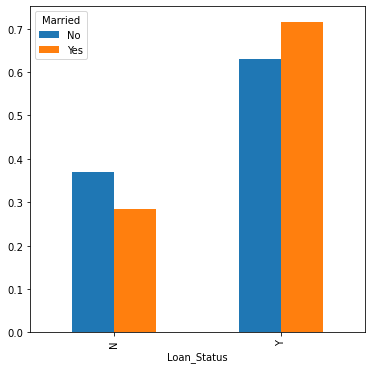

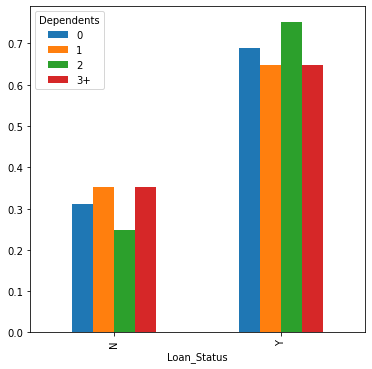

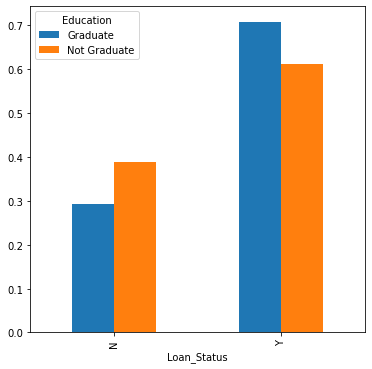

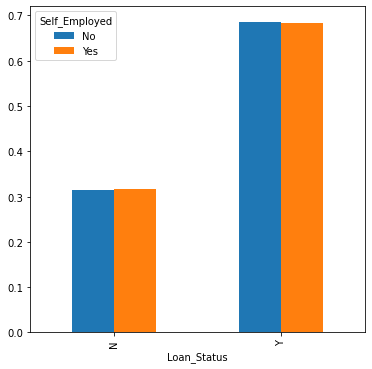

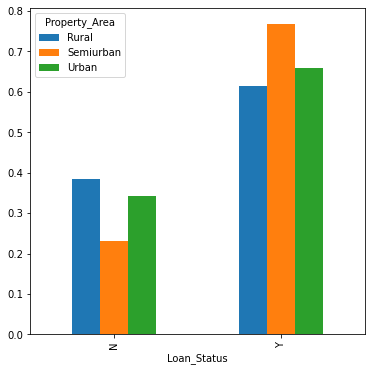

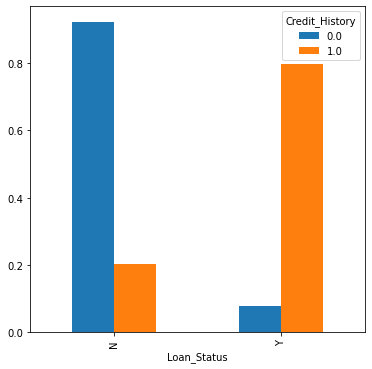

In [92]:
# Alterntively

#############################################################################################
categorical_columns1 = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History']
for i in categorical_columns1 :
    j = pd.crosstab(train['Loan_Status'],train[i],normalize = 'columns')
    print(j)
    j.plot(kind = 'bar', stacked = False, figsize = (6,6))

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


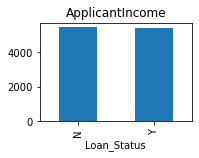

Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64


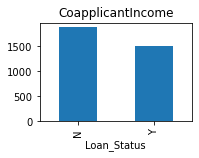

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64


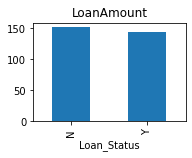

Loan_Status
N    344.064516
Y    341.072464
Name: Loan_Amount_Term, dtype: float64


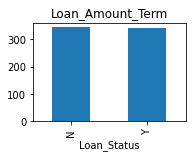

In [93]:
# Relationship with numerical variables
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
for idx,m in enumerate(numerical_columns):
    plt.subplot(222)
    a = train.groupby('Loan_Status')[m].mean()
    print(a)
    a.plot.bar(title = m)
    plt.show()


- Loan applicants with unapproved loan status have a slightly higher mean.
 
Creating bins for applicant income, co-applicant income, and loan amount variables can help get meaningful insights from the data.

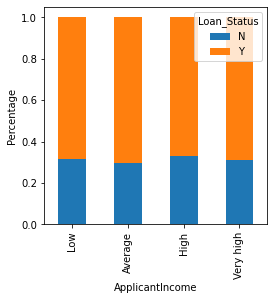

In [94]:
bins=[0,2500,4000,8000,50000]
group=['Low','Average','High','Very high']
train['income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
##############################################################################################
income_bin=pd.crosstab(train['income_bin'],train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

- Applicant Income doesn’t impact the loan approval rate

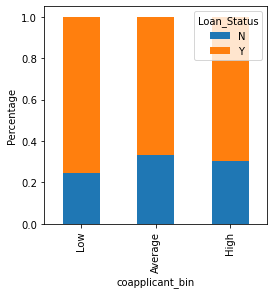

In [95]:
bins=[0,2500,4000,8000]
group=['Low','Average','High']
train['coapplicant_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
##############################################################################################
coloan_bin=pd.crosstab(train['coapplicant_bin'],train['Loan_Status'])
coloan_bin.div(coloan_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('coapplicant_bin')
plt.ylabel('Percentage')
plt.show()

- The rejection rate for applicants with low co-applicant income is the least, this is not look right.
-A logical explation would be that since most of the time applicants do not have coapplicant hence the coapplicant is zero, the loan approval is not dependant on coapplicant loan
- To draw a better conclusion, let us combine the applicants income and coapplicant

In [96]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

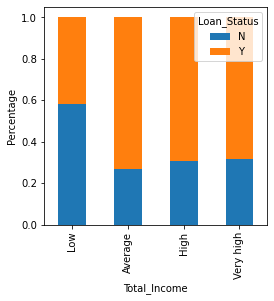

In [97]:
bins=[0,2500,4000,8000,50000]
group=['Low','Average','High','Very high']
train['income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
##############################################################################################
income_bin=pd.crosstab(train['income_bin'],train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

-The approval rate for low-earning applicants is the least compared to all income groups.


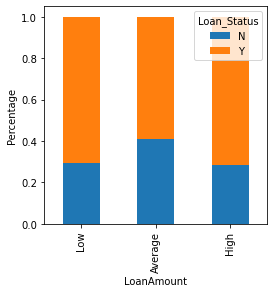

In [98]:
bins=[0,200,400,700]
group=['Low','Average','High']
train['loanamount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
##############################################################################################
loan_bin=pd.crosstab(train['loanamount_bin'],train['Loan_Status'])
loan_bin.div(loan_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

- Proportion of approved loans is higher for low loan amount

In [99]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'income_bin', 'coapplicant_bin', 'Total_Income', 'loanamount_bin'],
      dtype='object')

In [100]:
# Lets us drop the newly created columns and show correlation between the dependent variable and numerical variables
train=train.drop(columns=['income_bin', 'coapplicant_bin', 'Total_Income','loanamount_bin'])

In [101]:
# Replace the categorical variable of loan status with o0 and 1: 0 for N and 1 for Y
train['Loan_Status']=train['Loan_Status'].replace({'N':0,'Y':1})


In [102]:
train['Dependents']=train['Dependents'].replace('3+',3)

# Correlation

<AxesSubplot:>

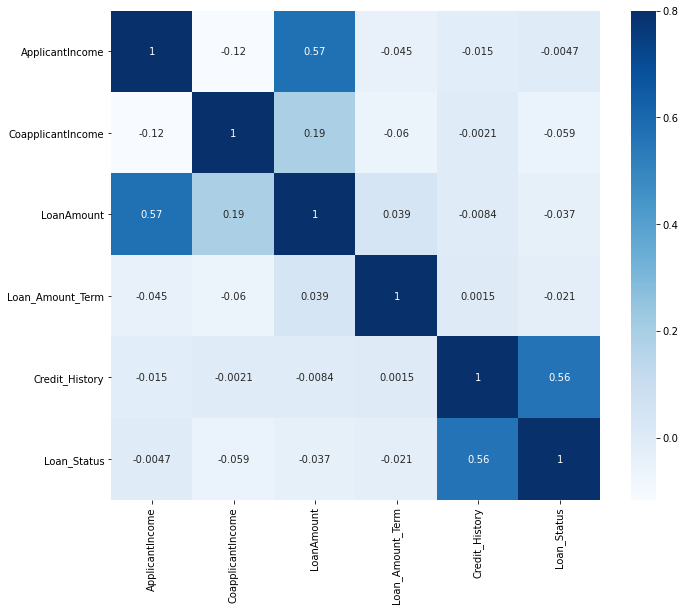

In [103]:
cor=train.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap 
sns.heatmap(cor, cmap= 'Blues',  vmax=.8, square=True,annot=True)

Heat map visualises correlation with colouring. The darker the color the high the correlation
- Applicant Income  is positively correlated with Loan Amount
- Credit History is positively correlated with Loan Status
- No correlation between loan approval rate with  Loan_amount_term, Loan Amount, Co-applicant income



**Data Pre-processing**
- Data pre-processing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data pre-processing is a method of resolving such issues.

# Missing values and outlier treatment

In [104]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [105]:
# Missing values
percent_missing = round(train.isnull().sum() * 100 / len(train),2)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Loan_ID,Loan_ID,0.00
Gender,Gender,2.12
Married,Married,0.49
Dependents,Dependents,2.44
Education,Education,0.00
Self_Employed,Self_Employed,5.21
ApplicantIncome,ApplicantIncome,0.00
CoapplicantIncome,CoapplicantIncome,0.00
LoanAmount,LoanAmount,3.58
Loan_Amount_Term,Loan_Amount_Term,2.28


 Train data has missing values in 7 columns of less than 10% (**Gender,Married,Dependants,employment,loanamount,loan amount term,credit history**)

In [106]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [107]:
percent_missing = round(test.isnull().sum() * 100 / len(test),2)
missing_value_df = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Loan_ID,Loan_ID,0.00
Gender,Gender,3.00
Married,Married,0.00
Dependents,Dependents,2.72
Education,Education,0.00
Self_Employed,Self_Employed,6.27
ApplicantIncome,ApplicantIncome,0.00
CoapplicantIncome,CoapplicantIncome,0.00
LoanAmount,LoanAmount,1.36
Loan_Amount_Term,Loan_Amount_Term,1.63


- Train data has missing values in 6 columns of less than 10% (Gender,Dependants,employment,loanamount,loan amount term,credit history)
- Since the % of missing values is low for both datasets we shall replace the values instead of dropping


Imputation method will be used to fill in the missing value
   - Numerical values: Impute with mean
   - Categorical values:Impute with mode

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [109]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())# Replace with median since it has outliers
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())
###############################################################################################
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Gender'] = train['Gender'].fillna(train['Gender'].mode())
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [110]:
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())# We replace with median since it has outliers
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())
###############################################################################################
#test['Married'] = test['Married'].fillna(test['Married'].mode())
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [111]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

 Outliers have significant effect on the mean and standard deviation. The best way to deal with this is to do log transformation
- Since the loan amount had outliers, it is good to do log transformation inorder to get right results

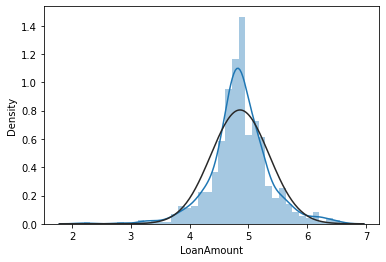

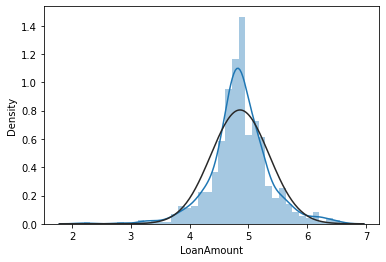

<Figure size 432x288 with 0 Axes>

In [112]:
from scipy.stats import norm
train['LoanAmount'] = np.log(train['LoanAmount'])
sns.distplot(train['LoanAmount'], fit=norm)
fig = plt.figure()
##############################################################TEST############################
test['LoanAmount'] = np.log(test['LoanAmount'])
sns.distplot(train['LoanAmount'], fit=norm)
fig = plt.figure()


- The data looks normally distributed. The extreme values have been transormed

# MODEL BUILDING

Let us start with Logistic Regression
- 
**LOGISTIC REGRESSION**
- Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature

Since we still have categorical variables in our data, it is good to convert them to numerical for easy analysis

In [113]:

# drop Loan_ID 
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [114]:
#### Splitting the dataset into the target and feature variables which will be used for training the data
x=train.drop(columns=['Loan_Status'])
y=train.Loan_Status

In [115]:
# adding dummies to the dataset
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)


In [116]:
x.shape,test.shape,train.shape

((614, 20), (367, 20), (614, 21))

- Splitting thedata into train data for training the model and test data for mking predictions
- We shall validate the model by spliting the train data into: train and validation before testing on test data

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Split 70% for training and 30% for validation
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=0)


In [118]:
#y_train[np.isnan(y_train)] = np.median(y_train[~np.isnan(y_train)])

In [119]:
#np.isnan(y_train).any()

In [120]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Model evaluation

In [121]:
valid_pred = logreg.predict(X_valid)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logreg.score(X_valid, y_valid)))



Accuracy of logistic regression classifier on validation set: 0.83


The accuracy of the predictions is 83%. The model has identified 83% of the approved loans accurately


[[ 22  29]
 [  2 132]]


Text(33.0, 0.5, 'True')

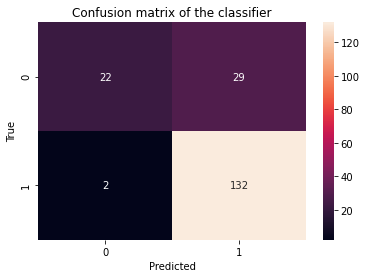

In [122]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_valid, valid_pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [123]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_valid, valid_pred))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



In [124]:
# Making a prediction on the test data
test_prediction = logreg.predict(test)
test_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [125]:
submission=pd.read_csv('sample_submission_49d68Cx (1).csv')
# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = test_prediction
submission['Loan_ID'] = test_df['Loan_ID']
# Convert loan status back to N and Y
submission['Loan_Status']=submission['Loan_Status'].replace({0:'N',1:'Y'})


In [126]:
submission.to_csv("Submission.csv", index=False)

In [127]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# DECISION TREE